Questao 1

a) Visualizacao e analise analitica

Resultados Analíticos:
Valor da primitiva em F(0): 0.000000
Valor da primitiva em F(1): 0.000000
Integral definida de 0 a 1: 0.000000


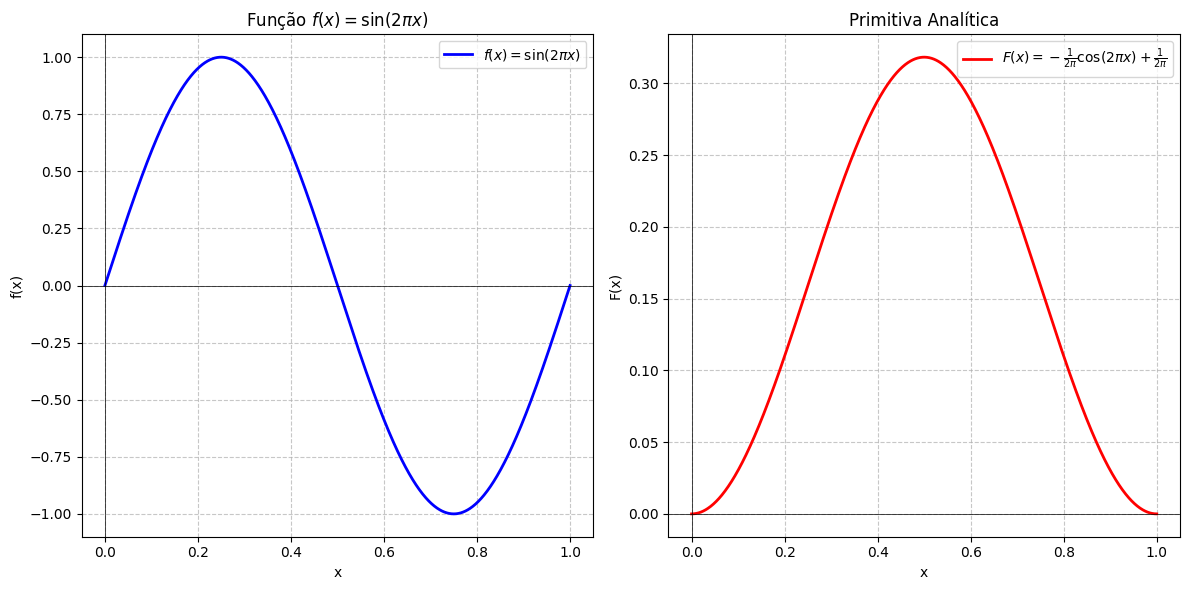

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#dominio da funcao
N = 1001 # numero de pontos
x = np.linspace(0, 1, N)
dx = x[1] - x[0] 

#f(x)
f = np.sin(2 * np.pi * x)

#primitiva analitica
C = 1/(2*np.pi)  # isso pois -1/(2π) * cos(0) + C = 0  => C = 1/(2π)
F_analitica = -1/(2*np.pi) * np.cos(2 * np.pi * x) + C

#integral analitica
integral_analitica = 0.0 #volta completa do seno

#resultados analiticos
print("Resultados Analíticos:")
print(f"Valor da primitiva em F(0): {F_analitica[0]:.6f}")
print(f"Valor da primitiva em F(1): {F_analitica[-1]:.6f}")
print(f"Integral definida de 0 a 1: {F_analitica[-1] - F_analitica[0]:.6f}")


#visualizacao
plt.figure(figsize=(12, 6))

# funcao
plt.subplot(1, 2, 1)
plt.plot(x, f, 'b-', label='$f(x) = \sin(2\pi x)$', linewidth=2)
plt.title('Função $f(x) = \sin(2\pi x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()

# primitiva
plt.subplot(1, 2, 2)
plt.plot(x, F_analitica, 'r-', label='$F(x) = -\\frac{1}{2\pi}\cos(2\pi x) + \\frac{1}{2\pi}$', linewidth=2)
plt.title('Primitiva Analítica')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()

    

b) Metodo do trapezio

In [4]:
#Parametros
n = 10  # subintervalos
a, b = 0, 1  # limites de integracao
h = (b - a)/n  

#pontos 
x = np.linspace(a, b, n+1)

#calculando f nos pontos
f = np.sin(2 * np.pi * x)

# regra do trapezio
integral_trapezio = (h/2) * (f[0] + 2 * np.sum(f[1:-1]) + f[-1])

# erro absoluto
erro_absoluto = np.abs(integral_trapezio - integral_analitica)

print(f"Resultado da regra do trapézio (n={n}): {integral_trapezio:.10f}")
print(f"Erro absoluto: {erro_absoluto:.10f}")


Resultado da regra do trapézio (n=10): -0.0000000000
Erro absoluto: 0.0000000000


c) Simpson

Metodo de Simpson (n=10):
Resultado: -0.0000000000
Erro absoluto: 0.0000000000

Comparacao com a regra do trapezio:
Diferenca entre metodos: 0.0000000000


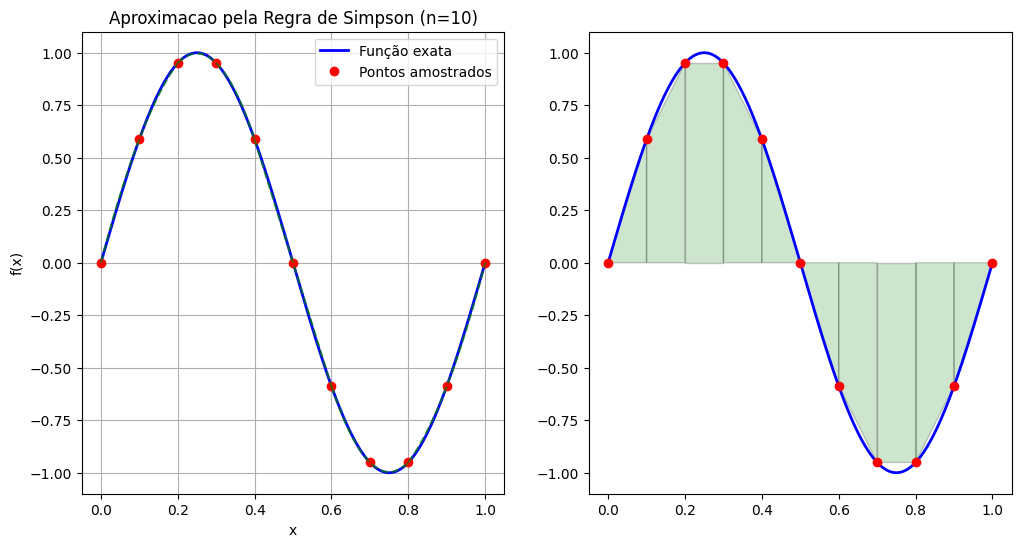

In [5]:
# parametros
n = 10  #subintervalos (par)
a, b = 0, 1  # limites 
h = (b - a)/n 

# Pontos x
x = np.linspace(a, b, n+1)

# funcao nos pontos
f = np.sin(2 * np.pi * x)

# regra de Simpson (n deve ser par)
integral_simpson = (h/3) * (f[0] + 4*np.sum(f[1:-1:2]) + 2*np.sum(f[2:-2:2]) + f[-1])

# erro absoluto de Simpson
erro_absoluto_simpson = np.abs(integral_simpson - 0.0)  # valor analítico = 0

# resultados anteriores
integral_trapezio = 0.0  # resultado obtido anteriormente
erro_trapezio = 0.0

print("Metodo de Simpson (n=10):")
print(f"Resultado: {integral_simpson:.10f}")
print(f"Erro absoluto: {erro_absoluto_simpson:.10f}")

print("\nComparacao com a regra do trapezio:")
print(f"Diferenca entre metodos: {np.abs(integral_simpson - integral_trapezio):.10f}")

# VIZUU
plt.figure(figsize=(12, 6))

# Grafico de f com a aproximacao de Simpson
plt.subplot(1, 2, 1)
plt.plot(np.linspace(a, b, 1000), np.sin(2 * np.pi * np.linspace(a, b, 1000)), 
         'b-', label='Função exata', linewidth=2)

# destaque dos pontos
plt.plot(x, f, 'ro', label='Pontos amostrados')

# Desenhar parabolas aproximadas em cada par de subintervalos
for i in range(0, n, 2):
    xi = x[i:i+3]
    fi = f[i:i+3]
    coeffs = np.polyfit(xi, fi, 2)
    x_fit = np.linspace(xi[0], xi[2], 50)
    y_fit = np.polyval(coeffs, x_fit)
    plt.plot(x_fit, y_fit, 'g--', alpha=0.7)

plt.title('Aproximacao pela Regra de Simpson (n=10)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

# Comparacaoo com o metodo do trapezio 
plt.subplot(1, 2, 2)
plt.plot(np.linspace(a, b, 1000), np.sin(2 * np.pi * np.linspace(a, b, 1000)), 
         'b-', label='Função exata', linewidth=2)
plt.plot(x, f, 'ro', label='Pontos amostrados')

# Desenhar trapezios
for i in range(n):
    plt.fill([x[i], x[i], x[i+1], x[i+1]], 
             [0, f[i], f[i+1], 0], 'g', alpha=0.2, edgecolor='k')




d) metodo adaptativo

In [8]:
import numpy as np

# parametros
a, b = 0, 1  # limites 
epsilon = 1e-6  # precisão desejada
n = 2  # número inicial de subintervalos (par))
max_iter = 20  # max iteracoes
integral_prev = 0  # valor anterior da integral

print("Iteração | Subintervalos | Estimativa da Integral | Diferença")
print("--------|--------------|-----------------------|----------")

for iteration in range(max_iter):
    h = (b - a)/n
    x = np.linspace(a, b, n+1)
    f = np.sin(2*np.pi*x)
    
    # Regra de Simpson composta
    integral = (h/3) * (f[0] + 4*np.sum(f[1:-1:2]) + 2*np.sum(f[2:-2:2]) + f[-1])
    
    # diferença em relação à iteracao anterior
    difference = np.abs(integral - integral_prev) if iteration > 0 else np.inf
    
    print(f"{iteration+1:7d} | {n:12d} | {integral:21.10f} | {difference:.2e}")
    
    # Criterio de convergencia
    if difference < epsilon:
        break
        
    integral_prev = integral
    n *= 2  # dobra o numero de subintervalos

print("\nResultado final:")
print(f"Integral estimada: {integral:.10f}")
print(f"Subintervalos utilizados: {n}")
print(f"Número de iterações: {iteration+1}")



Iteração | Subintervalos | Estimativa da Integral | Diferença
--------|--------------|-----------------------|----------
      1 |            2 |          0.0000000000 | inf
      2 |            4 |          0.0000000000 | 4.08e-17

Resultado final:
Integral estimada: 0.0000000000
Subintervalos utilizados: 4
Número de iterações: 2


2) Exercicio 5.11 - Newman, Computational Physics

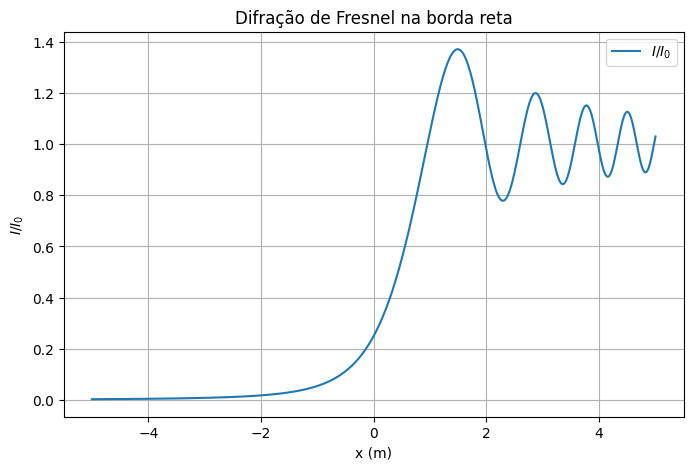

In [ ]:
#parametros
lamb = 1.0 #comprimento de onda
z = 3.0    # distancia da borda
x_vals = np.linspace(-5, 5, 500)  # posicoes
N = 50     #  # pontos para quadratura gaussiana

# Pontos e pesos para quadratura de gauss-legendre
t_nodes, t_weights = np.polynomial.legendre.leggauss(N)

# funcoes para C(u) e S(u)
def C(u):
    if u == 0:
        return 0.0
    nodes = 0.5 * u * (t_nodes + 1)  # mudanca de intervalo para [0, u]
    weights = 0.5 * u * t_weights
    integrand = np.cos(0.5 * np.pi * nodes**2)
    return np.sum(weights * integrand)

def S(u):
    if u == 0:
        return 0.0
    nodes = 0.5 * u * (t_nodes + 1)
    weights = 0.5 * u * t_weights
    integrand = np.sin(0.5 * np.pi * nodes**2)
    return np.sum(weights * integrand)

# Calculo de I/I0
I_ratio = []
for x in x_vals:
    u = x * np.sqrt(2 / (lamb * z))
    Cu = C(u)
    Su = S(u)
    I_ratio.append(( (2*Cu + 1)**2 + (2*Su + 1)**2 ) / 8)

I_ratio = np.array(I_ratio)

# Plot
plt.figure(figsize=(8,5))
plt.plot(x_vals, I_ratio, label=r"$I/I_0$")
plt.xlabel("x")
plt.ylabel(r"$I/I_0$")
plt.title("Difracão de Fresnel na borda reta")
plt.grid(True)
plt.legend()
plt.show()

3) Probabilidade acumulada da função de onda

x	Analítico	Gaussiana	Romberg		Erro Gauss	Erro Romberg
0.000	0.0000000000	0.0000000000	0.0000000000	0.00e+00	0.00e+00
0.251	0.0921062965	0.0921062965	0.0921062965	1.39e-17	1.39e-17
0.503	0.5050250213	0.5050250213	0.5050250213	1.11e-16	1.67e-15
0.749	0.9078937035	0.9078937035	0.9078937035	5.55e-16	3.33e-15
1.000	1.0000000000	1.0000000000	1.0000000000	7.77e-16	0.00e+00


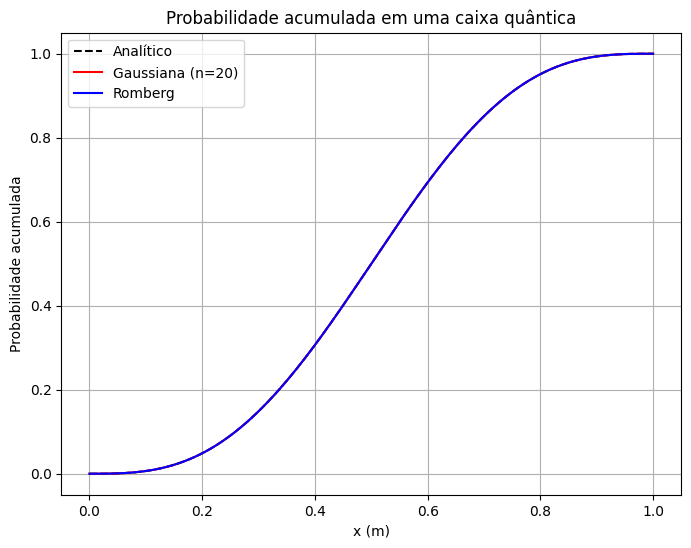

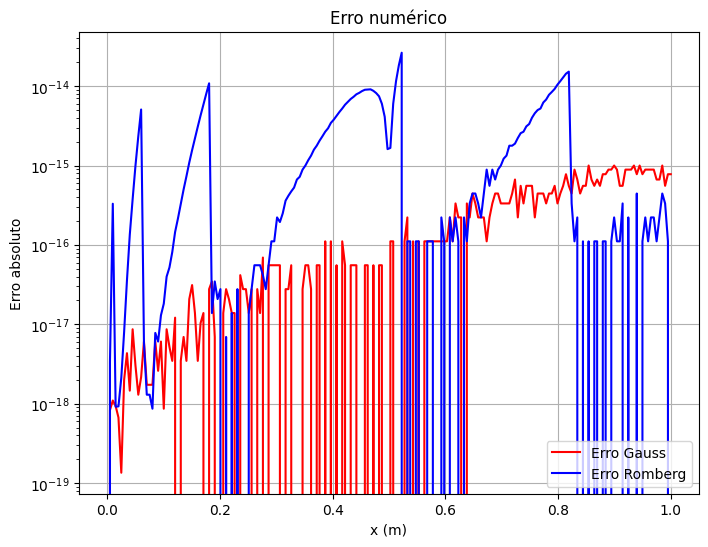

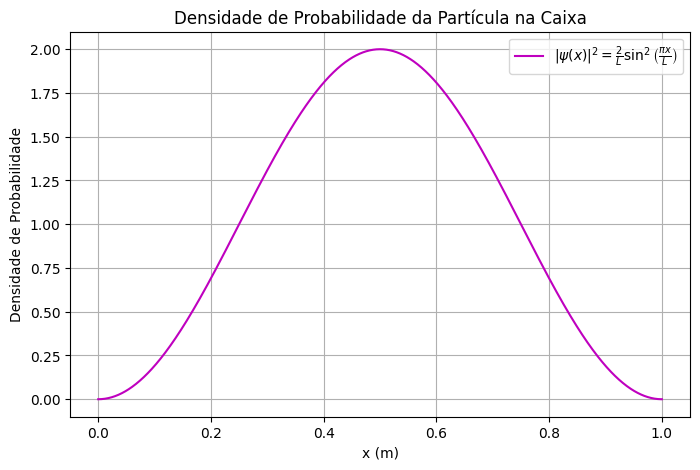

In [19]:

from numpy.polynomial.legendre import leggauss #facilitar vida 

# paramentros 
L = 1.0  # comprimento da caixa 
n_points = 200  # pontos para avaliacao da acumulada

# Funcao densidade de probabilidade |psi|^2
def psi_sq(x):
    return (2/L) * np.sin(np.pi * x / L)**2

# quad gaussiana
def gauss_quad(f, a, b, n):
    xi, wi = leggauss(n)
    t = 0.5*(xi + 1)*(b - a) + a
    return 0.5*(b - a) * np.sum(wi * f(t))

# metodo de Romberg

def romberg_int(f, a, b, max_k=10, tol=1e-10):
    R = np.zeros((max_k, max_k))
    # R[0,0] - regra do trapeio com 1 intervalo
    R[0, 0] = 0.5 * (b - a) * (f(a) + f(b))
    for k in range(1, max_k):
        n_intervals = 2**k
        h = (b - a) / n_intervals
        # soma dos pontos m novos
        soma = 0
        for i in range(1, n_intervals, 2):
            soma += f(a + i*h)
        R[k, 0] = 0.5 * R[k-1, 0] + h * soma
        # extrapolacao de Richardson
        for j in range(1, k+1):
            R[k, j] = R[k, j-1] + (R[k, j-1] - R[k-1, j-1]) / (4**j - 1)
        # criterio de parada
        if abs(R[k, k] - R[k-1, k-1]) < tol:
            return R[k, k]
    return R[max_k-1, max_k-1]

# Calculo das integrais acumuladas
x_vals = np.linspace(0, L, n_points)
gauss_vals = []
romberg_vals = []
analytic_vals = []

for x in x_vals:
    gauss_vals.append(gauss_quad(psi_sq, 0, x, 20))
    romberg_vals.append(romberg_int(psi_sq, 0, x))
    analytic_vals.append(x/L - np.sin(2*np.pi*x/L)/(2*np.pi))

gauss_vals = np.array(gauss_vals)
romberg_vals = np.array(romberg_vals)
analytic_vals = np.array(analytic_vals)

# Erros
erro_gauss = np.abs(gauss_vals - analytic_vals)
erro_romberg = np.abs(romberg_vals - analytic_vals)

# Impressão de resultados numericos 
print("x\tAnalítico\tGaussiana\tRomberg\t\tErro Gauss\tErro Romberg")
pontos_chave = np.linspace(0, L, 5)  # 5 pontos: 0, 0.25, 0.5, 0.75, 1.0

for x in pontos_chave:
    idx = np.argmin(np.abs(x_vals - x))
    print(f"{x_vals[idx]:.3f}\t{analytic_vals[idx]:.10f}\t{gauss_vals[idx]:.10f}\t{romberg_vals[idx]:.10f}\t{erro_gauss[idx]:.2e}\t{erro_romberg[idx]:.2e}")


# Graficos

plt.figure(figsize=(8,6))
plt.plot(x_vals, analytic_vals, 'k--', label="Analítico")
plt.plot(x_vals, gauss_vals, 'r', label="Gaussiana (n=20)")
plt.plot(x_vals, romberg_vals, 'b', label="Romberg")
plt.xlabel("x (m)")
plt.ylabel("Probabilidade acumulada")
plt.legend()
plt.grid(True)
plt.title("Probabilidade acumulada em uma caixa quântica")
plt.show()

plt.figure(figsize=(8,6))
plt.semilogy(x_vals, erro_gauss, 'r', label="Erro Gauss")
plt.semilogy(x_vals, erro_romberg, 'b', label="Erro Romberg")
plt.xlabel("x (m)")
plt.ylabel("Erro absoluto")
plt.legend()
plt.grid(True)
plt.title("Erro numérico")
plt.show()

#funcao integranda
x = np.linspace(0, L, 1000)  # 1000 pontos entre 0 e L
y = (2/L) * np.sin(np.pi * x / L)**2

#grafico da funcao integranda
plt.figure(figsize=(8,5))
plt.plot(x, y, 'm', label=r'$|\psi(x)|^2 = \frac{2}{L} \sin^2\left(\frac{\pi x}{L}\right)$')
plt.xlabel('x (m)')
plt.ylabel('Densidade de Probabilidade')
plt.title('Densidade de Probabilidade da Partícula na Caixa')
plt.legend()
plt.grid(True)
plt.show()
